In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

        Date  HDSV0A2 Curncy  HDSV0A1 Curncy  HDSV0210 Curncy  HDSV101 Curncy  \
0 2005-05-25            30.5            37.5            18.70           18.00   
1 2005-05-26            31.5            37.5            18.80           18.00   
2 2005-05-27            30.5            36.0            18.80           17.90   
3 2005-05-30            31.0            35.5            18.80           17.90   
4 2005-05-31            30.5            35.0            18.85           18.05   

   HDSV015 Curncy  HDSV0110 Curncy  HDSV0C2 Curncy  USSN0C10 Curncy  \
0           23.60            20.00           30.70            83.60   
1           23.60            20.10           30.30            83.60   
2           23.60            20.20           30.60            82.15   
3           23.60            20.10           30.60            82.15   
4           22.55            18.75           28.75            83.30   

   USSN0110 Curncy  ...  USSN036 Curncy  USSN038 Curncy  USSN039 Curncy  \
0          

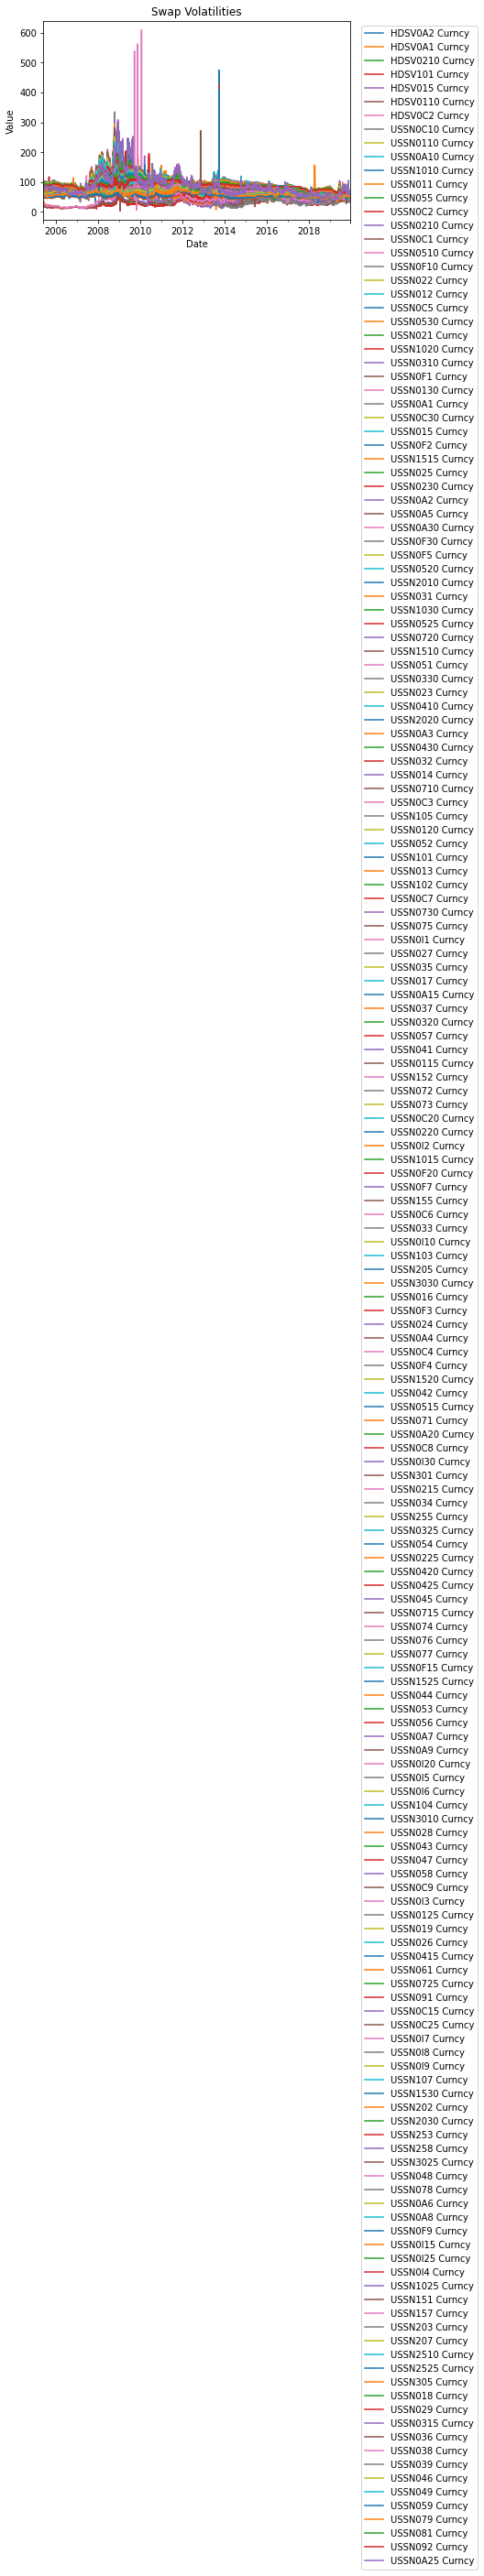

In [174]:
df = pd.read_excel('HKSwap2.xlsx', parse_dates=[0]) 
print(df.head())
#df = pd.read_excel('USInterestRate.xlsx', parse_dates=['Date'])

# Set the index of the DataFrame to the date column
df.set_index('Date', inplace=True)

# Plot the DataFrame using Matplotlib
df.plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Swap Volatilities')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

In [175]:
import matplotlib.pyplot as plt

In [178]:
X = df.iloc[:, 1:].values
Date = df.iloc[:,0].index
HK = X[:,:7]
USA = X[:,7:]

(3798, 184)


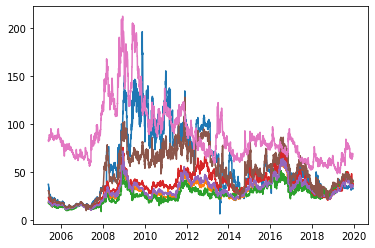

In [179]:
print(X.shape)
plt.plot(Date,HK)

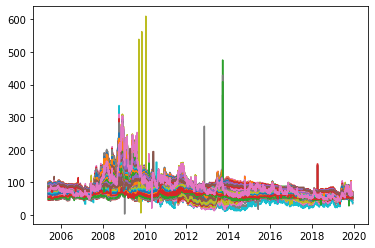

In [182]:
plt.plot(Date, USA)

In [185]:
Stats = np.mean(HK,0)
StatsUS = np.mean(USA,0)
print(StatsUS)



[90.97514047 88.83793952 78.96212712 73.20594031 93.42237507 68.15496719
 91.92280585 55.00197809 89.59418799 89.89618339 90.14398847 79.90830058
 86.31478175 78.660898   87.50403349 70.15048291 91.69571093 61.46287204
 85.22631288 51.64012449 87.14655814 89.8571044  72.36403483 65.18900197
 93.17947143 84.01073231 66.14197665 86.01592612 87.83611559 86.36527757
 87.54390332 80.95888225 63.7776891  93.84066227 67.90428747 79.62736656
 76.42103681 70.06953989 96.39705477 82.40628957 91.46280816 90.6339911
 57.67968215 74.4237712  80.35779265 94.58888133 87.33313568 85.27557019
 75.96992486 83.22482559 86.834598   95.71725303 87.34379144 84.04755232
 86.29565951 88.24242878 73.98509186 89.58238952 67.89208815 92.60226151
 94.29434466 90.7072857  88.73552062 93.30442399 84.66819895 91.67665998
 96.18824708 88.40207773 75.8568564  92.24001983 91.31600714 87.91416361
 86.03199139 76.41356095 73.22170369 87.43086003 89.27817127 73.41654226
 87.74307004 94.62111056 90.55186688 85.19433836 66.

In [186]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
PC = pca.fit_transform(HK)

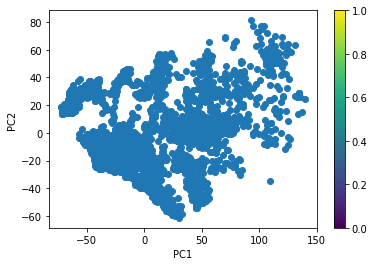

In [187]:
plt.scatter(PC[:,0], PC[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


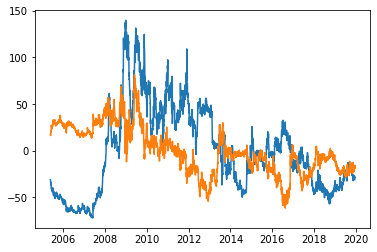

In [188]:
plt.plot(Date,PC)

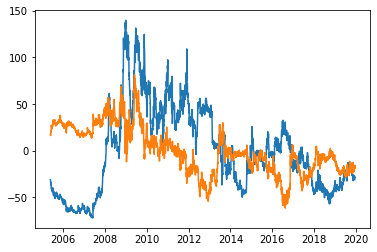

In [189]:

# Assuming you already have an array named X
plt.plot(Date, PC)
plt.show()


In [195]:
Xhat = pca.inverse_transform(PC)
Xhat = Xhat


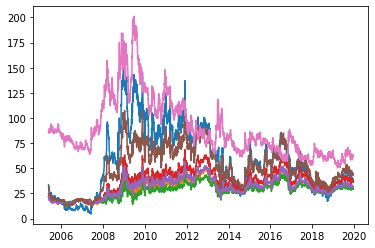

In [196]:
plt.plot(Date, Xhat)

1164995.9812150355


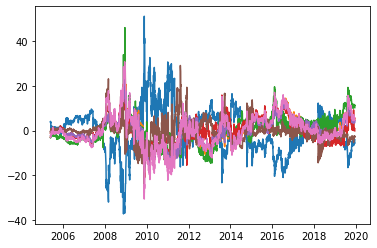

In [197]:
ERROR = HK - Xhat
plt.plot(Date,ERROR)
SEE = np.sum(ERROR**2,axis=0)
SEE1 = np.sum(SEE)
print(SEE1)

In [198]:
variance_ratio = pca.explained_variance_ratio_

# Calculate the total percentage of the variance captured by the first two principal components
total_variance = np.sum(variance_ratio[:3])
percent_total_variance = total_variance * 100

print(f'The first three principal components explain {percent_total_variance:.2f}% of the total variance.')






The first three principal components explain 89.92% of the total variance.


In [199]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load data into a NumPy array
# Define the dimensions of the input and latent spaces
input_dim = X.shape[1]
latent_dim = 1

# Define the encoder
inputs = Input(shape=(input_dim,))
encoded = Dense(16, activation='sigmoid')(inputs)
encoded = Dense(2, activation='relu')(encoded)

# Define the decoder
decoded = Dense(16, activation='sigmoid')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

# Define the autoencoder
autoencoder = Model(inputs, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X, epochs=10000)

# Extract the encoder model for dimensionality reduction
encoder = Model(inputs, encoded)
encoded_X = encoder.predict(X)




Epoch 1/10000
119/119 [==============================] - 1s 761us/step - loss: 7203.0005
Epoch 2/10000
119/119 [==============================] - 0s 727us/step - loss: 7000.6694
Epoch 3/10000
119/119 [==============================] - 0s 735us/step - loss: 6767.8809
Epoch 4/10000
119/119 [==============================] - 0s 735us/step - loss: 6510.1001
Epoch 5/10000
119/119 [==============================] - 0s 727us/step - loss: 6234.2725
Epoch 6/10000
119/119 [==============================] - 0s 782us/step - loss: 5947.2476
Epoch 7/10000
119/119 [==============================] - 0s 727us/step - loss: 5655.6885
Epoch 8/10000
119/119 [==============================] - 0s 735us/step - loss: 5364.5576
Epoch 9/10000
119/119 [==============================] - 0s 726us/step - loss: 5078.0659
Epoch 10/10000
119/119 [==============================] - 0s 727us/step - loss: 4799.0728
Epoch 11/10000
119/119 [==============================] - 0s 727us/step - loss: 4529.6792
Epoch 12/10000
119/

119/119 [==============================] - 0s 761us/step - loss: 457.1968
Epoch 93/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1945
Epoch 94/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1926
Epoch 95/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1899
Epoch 96/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2036
Epoch 97/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2072
Epoch 98/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2004
Epoch 99/10000
119/119 [==============================] - 0s 735us/step - loss: 457.1955
Epoch 100/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2014
Epoch 101/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2413
Epoch 102/10000
119/119 [==============================] - 0s 747us/step - loss: 457.2039
Epoch 103/10000
119/119 [========

119/119 [==============================] - 0s 718us/step - loss: 457.2065
Epoch 184/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2251
Epoch 185/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2064
Epoch 186/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2148
Epoch 187/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2127
Epoch 188/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1903
Epoch 189/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2129
Epoch 190/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2011
Epoch 191/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1968
Epoch 192/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2113
Epoch 193/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2079
Epoch 194/10000
119/119 [=

119/119 [==============================] - 0s 715us/step - loss: 457.2170
Epoch 275/10000
119/119 [==============================] - 0s 708us/step - loss: 457.2084
Epoch 276/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2268
Epoch 277/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2188
Epoch 278/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2035
Epoch 279/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2104
Epoch 280/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2061
Epoch 281/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1975
Epoch 282/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2367
Epoch 283/10000
119/119 [==============================] - 0s 726us/step - loss: 457.2009
Epoch 284/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2201
Epoch 285/10000
119/119 [=

119/119 [==============================] - 0s 715us/step - loss: 457.1975
Epoch 366/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1977
Epoch 367/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1936
Epoch 368/10000
119/119 [==============================] - 0s 714us/step - loss: 457.2189
Epoch 369/10000
119/119 [==============================] - 0s 723us/step - loss: 457.1973
Epoch 370/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1967
Epoch 371/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2155
Epoch 372/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1959
Epoch 373/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2130
Epoch 374/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2030
Epoch 375/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2581
Epoch 376/10000
119/119 [=

119/119 [==============================] - 0s 727us/step - loss: 457.1922
Epoch 457/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2190
Epoch 458/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1973
Epoch 459/10000
119/119 [==============================] - 0s 717us/step - loss: 457.2359
Epoch 460/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2083
Epoch 461/10000
119/119 [==============================] - 0s 719us/step - loss: 457.2193
Epoch 462/10000
119/119 [==============================] - 0s 716us/step - loss: 457.1870
Epoch 463/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2013
Epoch 464/10000
119/119 [==============================] - 0s 738us/step - loss: 457.2116
Epoch 465/10000
119/119 [==============================] - 0s 739us/step - loss: 457.2328
Epoch 466/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2118
Epoch 467/10000
119/119 [=

119/119 [==============================] - 0s 710us/step - loss: 457.2063
Epoch 548/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1972
Epoch 549/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2106
Epoch 550/10000
119/119 [==============================] - 0s 714us/step - loss: 457.1996
Epoch 551/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2015
Epoch 552/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2163
Epoch 553/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2012
Epoch 554/10000
119/119 [==============================] - 0s 707us/step - loss: 457.2124
Epoch 555/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2095
Epoch 556/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1877
Epoch 557/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1960
Epoch 558/10000
119/119 [=

119/119 [==============================] - 0s 710us/step - loss: 457.2249
Epoch 639/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2099
Epoch 640/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2110
Epoch 641/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2316
Epoch 642/10000
119/119 [==============================] - 0s 719us/step - loss: 457.2105
Epoch 643/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1945
Epoch 644/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2358
Epoch 645/10000
119/119 [==============================] - 0s 743us/step - loss: 457.1920
Epoch 646/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2068
Epoch 647/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2144
Epoch 648/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1926
Epoch 649/10000
119/119 [=

119/119 [==============================] - 0s 718us/step - loss: 457.1960
Epoch 730/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2549
Epoch 731/10000
119/119 [==============================] - 0s 716us/step - loss: 457.1981
Epoch 732/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1992
Epoch 733/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2358
Epoch 734/10000
119/119 [==============================] - 0s 714us/step - loss: 457.2115
Epoch 735/10000
119/119 [==============================] - 0s 708us/step - loss: 457.1952
Epoch 736/10000
119/119 [==============================] - 0s 719us/step - loss: 457.2083
Epoch 737/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2013
Epoch 738/10000
119/119 [==============================] - 0s 716us/step - loss: 457.2114
Epoch 739/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1866
Epoch 740/10000
119/119 [=

119/119 [==============================] - 0s 718us/step - loss: 457.2151
Epoch 821/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2049
Epoch 822/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1967
Epoch 823/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2046
Epoch 824/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2331
Epoch 825/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2143
Epoch 826/10000
119/119 [==============================] - 0s 709us/step - loss: 457.1930
Epoch 827/10000
119/119 [==============================] - 0s 744us/step - loss: 457.2212
Epoch 828/10000
119/119 [==============================] - 0s 714us/step - loss: 457.1990
Epoch 829/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2021
Epoch 830/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1939
Epoch 831/10000
119/119 [=

119/119 [==============================] - 0s 718us/step - loss: 457.1853
Epoch 912/10000
119/119 [==============================] - 0s 714us/step - loss: 457.1943
Epoch 913/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1962
Epoch 914/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2221
Epoch 915/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2040
Epoch 916/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2428
Epoch 917/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1966
Epoch 918/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1948
Epoch 919/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2174
Epoch 920/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2232
Epoch 921/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2133
Epoch 922/10000
119/119 [=

119/119 [==============================] - 0s 717us/step - loss: 457.2082
Epoch 1003/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2336
Epoch 1004/10000
119/119 [==============================] - 0s 723us/step - loss: 457.2101
Epoch 1005/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2025
Epoch 1006/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2230
Epoch 1007/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1980
Epoch 1008/10000
119/119 [==============================] - 0s 744us/step - loss: 457.2100
Epoch 1009/10000
119/119 [==============================] - 0s 724us/step - loss: 457.1976
Epoch 1010/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2031
Epoch 1011/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2096
Epoch 1012/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1903
Epoch 1013/10000

119/119 [==============================] - 0s 710us/step - loss: 457.1916
Epoch 1093/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2312
Epoch 1094/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2112
Epoch 1095/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2076
Epoch 1096/10000
119/119 [==============================] - 0s 719us/step - loss: 457.2241
Epoch 1097/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2206
Epoch 1098/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2220
Epoch 1099/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2124
Epoch 1100/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1973
Epoch 1101/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2095
Epoch 1102/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2064
Epoch 1103/10000

119/119 [==============================] - 0s 744us/step - loss: 457.2119
Epoch 1183/10000
119/119 [==============================] - 0s 709us/step - loss: 457.1845
Epoch 1184/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2257
Epoch 1185/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2353
Epoch 1186/10000
119/119 [==============================] - 0s 744us/step - loss: 457.1948
Epoch 1187/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1991
Epoch 1188/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1979
Epoch 1189/10000
119/119 [==============================] - 0s 747us/step - loss: 457.2191
Epoch 1190/10000
119/119 [==============================] - 0s 741us/step - loss: 457.2139
Epoch 1191/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1999
Epoch 1192/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1941
Epoch 1193/10000

119/119 [==============================] - 0s 746us/step - loss: 457.2128
Epoch 1273/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1983
Epoch 1274/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2228
Epoch 1275/10000
119/119 [==============================] - 0s 716us/step - loss: 457.2111
Epoch 1276/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1992
Epoch 1277/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2320
Epoch 1278/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1893
Epoch 1279/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2140
Epoch 1280/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1916
Epoch 1281/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2054
Epoch 1282/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2151
Epoch 1283/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2239
Epoch 1363/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1910
Epoch 1364/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2117
Epoch 1365/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1998
Epoch 1366/10000
119/119 [==============================] - 0s 735us/step - loss: 457.1987
Epoch 1367/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2174
Epoch 1368/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1902
Epoch 1369/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2071
Epoch 1370/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2050
Epoch 1371/10000
119/119 [==============================] - 0s 769us/step - loss: 457.2214
Epoch 1372/10000
119/119 [==============================] - 0s 734us/step - loss: 457.2226
Epoch 1373/10000

119/119 [==============================] - 0s 715us/step - loss: 457.1909
Epoch 1453/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2191
Epoch 1454/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1977
Epoch 1455/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2170
Epoch 1456/10000
119/119 [==============================] - 0s 711us/step - loss: 457.2301
Epoch 1457/10000
119/119 [==============================] - 0s 712us/step - loss: 457.1945
Epoch 1458/10000
119/119 [==============================] - 0s 723us/step - loss: 457.2080
Epoch 1459/10000
119/119 [==============================] - 0s 712us/step - loss: 457.1875
Epoch 1460/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2216
Epoch 1461/10000
119/119 [==============================] - 0s 731us/step - loss: 457.2091
Epoch 1462/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2243
Epoch 1463/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2084
Epoch 1543/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2167
Epoch 1544/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2321
Epoch 1545/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2073
Epoch 1546/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1937
Epoch 1547/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2025
Epoch 1548/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2117
Epoch 1549/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2338
Epoch 1550/10000
119/119 [==============================] - 0s 723us/step - loss: 457.2189
Epoch 1551/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2144
Epoch 1552/10000
119/119 [==============================] - 0s 760us/step - loss: 457.2061
Epoch 1553/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2271
Epoch 1633/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2196
Epoch 1634/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2120
Epoch 1635/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2094
Epoch 1636/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2237
Epoch 1637/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1870
Epoch 1638/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2093
Epoch 1639/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2119
Epoch 1640/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2016
Epoch 1641/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1910
Epoch 1642/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2231
Epoch 1643/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2442
Epoch 1723/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1944
Epoch 1724/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2150
Epoch 1725/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2149
Epoch 1726/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2124
Epoch 1727/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2186
Epoch 1728/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2201
Epoch 1729/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2018
Epoch 1730/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2190
Epoch 1731/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1895
Epoch 1732/10000
119/119 [==============================] - 0s 720us/step - loss: 457.2008
Epoch 1733/10000

119/119 [==============================] - 0s 709us/step - loss: 457.2096
Epoch 1813/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2022
Epoch 1814/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2043
Epoch 1815/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1990
Epoch 1816/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2089
Epoch 1817/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2290
Epoch 1818/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2013
Epoch 1819/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1996
Epoch 1820/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2072
Epoch 1821/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2030
Epoch 1822/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1986
Epoch 1823/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2042
Epoch 1903/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2039
Epoch 1904/10000
119/119 [==============================] - 0s 715us/step - loss: 457.1917
Epoch 1905/10000
119/119 [==============================] - 0s 717us/step - loss: 457.2146
Epoch 1906/10000
119/119 [==============================] - 0s 723us/step - loss: 457.2124
Epoch 1907/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2062
Epoch 1908/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2375
Epoch 1909/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1937
Epoch 1910/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1990
Epoch 1911/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2080
Epoch 1912/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2013
Epoch 1913/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2182
Epoch 1993/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2010
Epoch 1994/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1965
Epoch 1995/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2084
Epoch 1996/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2183
Epoch 1997/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2334
Epoch 1998/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2070
Epoch 1999/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2185
Epoch 2000/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2232
Epoch 2001/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2109
Epoch 2002/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2073
Epoch 2003/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2079
Epoch 2083/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1989
Epoch 2084/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2042
Epoch 2085/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2071
Epoch 2086/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2228
Epoch 2087/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2058
Epoch 2088/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1927
Epoch 2089/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2069
Epoch 2090/10000
119/119 [==============================] - 0s 786us/step - loss: 457.1860
Epoch 2091/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2330
Epoch 2092/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2262
Epoch 2093/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2090
Epoch 2173/10000
119/119 [==============================] - 0s 887us/step - loss: 457.2266
Epoch 2174/10000
119/119 [==============================] - 0s 717us/step - loss: 457.2239
Epoch 2175/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2131
Epoch 2176/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1982
Epoch 2177/10000
119/119 [==============================] - 0s 707us/step - loss: 457.2116
Epoch 2178/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2230
Epoch 2179/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2075
Epoch 2180/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2237
Epoch 2181/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2280
Epoch 2182/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2186
Epoch 2183/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2000
Epoch 2263/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2155
Epoch 2264/10000
119/119 [==============================] - 0s 769us/step - loss: 457.2144
Epoch 2265/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1884
Epoch 2266/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2300
Epoch 2267/10000
119/119 [==============================] - 0s 716us/step - loss: 457.2285
Epoch 2268/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1896
Epoch 2269/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2078
Epoch 2270/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2294
Epoch 2271/10000
119/119 [==============================] - 0s 717us/step - loss: 457.2375
Epoch 2272/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2121
Epoch 2273/10000

119/119 [==============================] - 0s 744us/step - loss: 457.2159
Epoch 2353/10000
119/119 [==============================] - 0s 714us/step - loss: 457.2163
Epoch 2354/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1957
Epoch 2355/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1935
Epoch 2356/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2256
Epoch 2357/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2043
Epoch 2358/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2119
Epoch 2359/10000
119/119 [==============================] - 0s 761us/step - loss: 457.2064
Epoch 2360/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2033
Epoch 2361/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2288
Epoch 2362/10000
119/119 [==============================] - 0s 716us/step - loss: 457.2361
Epoch 2363/10000

119/119 [==============================] - 0s 735us/step - loss: 457.2005
Epoch 2443/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2089
Epoch 2444/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2274
Epoch 2445/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2055
Epoch 2446/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2119
Epoch 2447/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2188
Epoch 2448/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2044
Epoch 2449/10000
119/119 [==============================] - 0s 744us/step - loss: 457.2052
Epoch 2450/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2086
Epoch 2451/10000
119/119 [==============================] - 0s 723us/step - loss: 457.2036
Epoch 2452/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1964
Epoch 2453/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2184
Epoch 2533/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2016
Epoch 2534/10000
119/119 [==============================] - 0s 739us/step - loss: 457.2129
Epoch 2535/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1967
Epoch 2536/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2263
Epoch 2537/10000
119/119 [==============================] - 0s 707us/step - loss: 457.1976
Epoch 2538/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2088
Epoch 2539/10000
119/119 [==============================] - 0s 746us/step - loss: 457.2516
Epoch 2540/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2003
Epoch 2541/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2210
Epoch 2542/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2132
Epoch 2543/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2289
Epoch 2623/10000
119/119 [==============================] - 0s 735us/step - loss: 457.1938
Epoch 2624/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2069
Epoch 2625/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1982
Epoch 2626/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1976
Epoch 2627/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1910
Epoch 2628/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2086
Epoch 2629/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1911
Epoch 2630/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2021
Epoch 2631/10000
119/119 [==============================] - 0s 735us/step - loss: 457.1941
Epoch 2632/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2068
Epoch 2633/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2169
Epoch 2713/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1845
Epoch 2714/10000
119/119 [==============================] - 0s 744us/step - loss: 457.2397
Epoch 2715/10000
119/119 [==============================] - 0s 722us/step - loss: 457.2060
Epoch 2716/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2279
Epoch 2717/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2422
Epoch 2718/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2119
Epoch 2719/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2144
Epoch 2720/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2199
Epoch 2721/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1960
Epoch 2722/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1998
Epoch 2723/10000

119/119 [==============================] - 0s 718us/step - loss: 457.1930
Epoch 2803/10000
119/119 [==============================] - 0s 761us/step - loss: 457.1978
Epoch 2804/10000
119/119 [==============================] - 0s 744us/step - loss: 457.2235
Epoch 2805/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2005
Epoch 2806/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2092
Epoch 2807/10000
119/119 [==============================] - 0s 761us/step - loss: 457.2200
Epoch 2808/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2008
Epoch 2809/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2093
Epoch 2810/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1897
Epoch 2811/10000
119/119 [==============================] - 0s 723us/step - loss: 457.2066
Epoch 2812/10000
119/119 [==============================] - 0s 736us/step - loss: 457.2092
Epoch 2813/10000

119/119 [==============================] - 0s 721us/step - loss: 457.2049
Epoch 2893/10000
119/119 [==============================] - 0s 740us/step - loss: 457.1928
Epoch 2894/10000
119/119 [==============================] - 0s 715us/step - loss: 457.1955
Epoch 2895/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2171
Epoch 2896/10000
119/119 [==============================] - 0s 735us/step - loss: 457.1951
Epoch 2897/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2383
Epoch 2898/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1989
Epoch 2899/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1951
Epoch 2900/10000
119/119 [==============================] - 0s 707us/step - loss: 457.2097
Epoch 2901/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2031
Epoch 2902/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2174
Epoch 2903/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2070
Epoch 2983/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1985
Epoch 2984/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2061
Epoch 2985/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2216
Epoch 2986/10000
119/119 [==============================] - 0s 738us/step - loss: 457.1941
Epoch 2987/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1974
Epoch 2988/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2053
Epoch 2989/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2113
Epoch 2990/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2026
Epoch 2991/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2005
Epoch 2992/10000
119/119 [==============================] - 0s 719us/step - loss: 457.1891
Epoch 2993/10000

119/119 [==============================] - 0s 702us/step - loss: 457.2008
Epoch 3073/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1990
Epoch 3074/10000
119/119 [==============================] - 0s 743us/step - loss: 457.2133
Epoch 3075/10000
119/119 [==============================] - 0s 713us/step - loss: 457.2044
Epoch 3076/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2397
Epoch 3077/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1989
Epoch 3078/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2479
Epoch 3079/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1937
Epoch 3080/10000
119/119 [==============================] - 0s 712us/step - loss: 457.2458
Epoch 3081/10000
119/119 [==============================] - 0s 769us/step - loss: 457.2004
Epoch 3082/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2126
Epoch 3083/10000

119/119 [==============================] - 0s 702us/step - loss: 457.2076
Epoch 3163/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2037
Epoch 3164/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1973
Epoch 3165/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2006
Epoch 3166/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2093
Epoch 3167/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2590
Epoch 3168/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1951
Epoch 3169/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2125
Epoch 3170/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2105
Epoch 3171/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1952
Epoch 3172/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2286
Epoch 3173/10000

119/119 [==============================] - 0s 740us/step - loss: 457.2094
Epoch 3253/10000
119/119 [==============================] - 0s 744us/step - loss: 457.2159
Epoch 3254/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2097
Epoch 3255/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2195
Epoch 3256/10000
119/119 [==============================] - 0s 744us/step - loss: 457.2065
Epoch 3257/10000
119/119 [==============================] - 0s 730us/step - loss: 457.1950
Epoch 3258/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2109
Epoch 3259/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2120
Epoch 3260/10000
119/119 [==============================] - 0s 704us/step - loss: 457.1968
Epoch 3261/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2144
Epoch 3262/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2296
Epoch 3263/10000

119/119 [==============================] - 0s 735us/step - loss: 457.2201
Epoch 3343/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2234
Epoch 3344/10000
119/119 [==============================] - 0s 716us/step - loss: 457.2102
Epoch 3345/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2122
Epoch 3346/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2287
Epoch 3347/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2123
Epoch 3348/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1976
Epoch 3349/10000
119/119 [==============================] - 0s 712us/step - loss: 457.1828
Epoch 3350/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1985
Epoch 3351/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2269
Epoch 3352/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2031
Epoch 3353/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2211
Epoch 3433/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1835
Epoch 3434/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2208
Epoch 3435/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2370
Epoch 3436/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2289
Epoch 3437/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2157
Epoch 3438/10000
119/119 [==============================] - 0s 745us/step - loss: 457.2268
Epoch 3439/10000
119/119 [==============================] - 0s 705us/step - loss: 457.1967
Epoch 3440/10000
119/119 [==============================] - 0s 733us/step - loss: 457.2065
Epoch 3441/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2074
Epoch 3442/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2195
Epoch 3443/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2056
Epoch 3523/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2177
Epoch 3524/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2190
Epoch 3525/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1922
Epoch 3526/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2445
Epoch 3527/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2059
Epoch 3528/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2302
Epoch 3529/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2091
Epoch 3530/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2058
Epoch 3531/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2106
Epoch 3532/10000
119/119 [==============================] - 0s 713us/step - loss: 457.2449
Epoch 3533/10000

119/119 [==============================] - 0s 702us/step - loss: 457.2234
Epoch 3613/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2065
Epoch 3614/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2179
Epoch 3615/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2205
Epoch 3616/10000
119/119 [==============================] - 0s 705us/step - loss: 457.2096
Epoch 3617/10000
119/119 [==============================] - 0s 706us/step - loss: 457.1983
Epoch 3618/10000
119/119 [==============================] - 0s 744us/step - loss: 457.2005
Epoch 3619/10000
119/119 [==============================] - 0s 705us/step - loss: 457.2207
Epoch 3620/10000
119/119 [==============================] - 0s 728us/step - loss: 457.2082
Epoch 3621/10000
119/119 [==============================] - 0s 722us/step - loss: 457.1977
Epoch 3622/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2011
Epoch 3623/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2013
Epoch 3703/10000
119/119 [==============================] - 0s 711us/step - loss: 457.2509
Epoch 3704/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2133
Epoch 3705/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2631
Epoch 3706/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2194
Epoch 3707/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2054
Epoch 3708/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2036
Epoch 3709/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1971
Epoch 3710/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2393
Epoch 3711/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2054
Epoch 3712/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2189
Epoch 3713/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2173
Epoch 3793/10000
119/119 [==============================] - 0s 706us/step - loss: 457.1852
Epoch 3794/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2171
Epoch 3795/10000
119/119 [==============================] - 0s 717us/step - loss: 457.2026
Epoch 3796/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2019
Epoch 3797/10000
119/119 [==============================] - 0s 707us/step - loss: 457.2188
Epoch 3798/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2037
Epoch 3799/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1984
Epoch 3800/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2060
Epoch 3801/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2213
Epoch 3802/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1985
Epoch 3803/10000

119/119 [==============================] - 0s 710us/step - loss: 457.1868
Epoch 3883/10000
119/119 [==============================] - 0s 720us/step - loss: 457.2005
Epoch 3884/10000
119/119 [==============================] - 0s 725us/step - loss: 457.2189
Epoch 3885/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2094
Epoch 3886/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2131
Epoch 3887/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2008
Epoch 3888/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2002
Epoch 3889/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2058
Epoch 3890/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2056
Epoch 3891/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2027
Epoch 3892/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2124
Epoch 3893/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2404
Epoch 3973/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2221
Epoch 3974/10000
119/119 [==============================] - 0s 693us/step - loss: 457.2198
Epoch 3975/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2004
Epoch 3976/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2375
Epoch 3977/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1956
Epoch 3978/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1966
Epoch 3979/10000
119/119 [==============================] - 0s 703us/step - loss: 457.2232
Epoch 3980/10000
119/119 [==============================] - 0s 715us/step - loss: 457.1944
Epoch 3981/10000
119/119 [==============================] - 0s 708us/step - loss: 457.2206
Epoch 3982/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2035
Epoch 3983/10000

119/119 [==============================] - 0s 724us/step - loss: 457.2080
Epoch 4063/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1943
Epoch 4064/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1941
Epoch 4065/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1941
Epoch 4066/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1959
Epoch 4067/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2348
Epoch 4068/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2273
Epoch 4069/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2437
Epoch 4070/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2099
Epoch 4071/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2121
Epoch 4072/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1999
Epoch 4073/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2147
Epoch 4153/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2292
Epoch 4154/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1938
Epoch 4155/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1943
Epoch 4156/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1870
Epoch 4157/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1952
Epoch 4158/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1947
Epoch 4159/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2310
Epoch 4160/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2402
Epoch 4161/10000
119/119 [==============================] - 0s 714us/step - loss: 457.2034
Epoch 4162/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1972
Epoch 4163/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2069
Epoch 4243/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2109
Epoch 4244/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1973
Epoch 4245/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2014
Epoch 4246/10000
119/119 [==============================] - 0s 708us/step - loss: 457.2036
Epoch 4247/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2071
Epoch 4248/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2266
Epoch 4249/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2078
Epoch 4250/10000
119/119 [==============================] - 0s 711us/step - loss: 457.2205
Epoch 4251/10000
119/119 [==============================] - 0s 703us/step - loss: 457.2161
Epoch 4252/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2146
Epoch 4253/10000

119/119 [==============================] - 0s 710us/step - loss: 457.1967
Epoch 4333/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2105
Epoch 4334/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2147
Epoch 4335/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1991
Epoch 4336/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1949
Epoch 4337/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2152
Epoch 4338/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2068
Epoch 4339/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2503
Epoch 4340/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2191
Epoch 4341/10000
119/119 [==============================] - 0s 699us/step - loss: 457.2068
Epoch 4342/10000
119/119 [==============================] - 0s 707us/step - loss: 457.2020
Epoch 4343/10000

119/119 [==============================] - 0s 740us/step - loss: 457.2260
Epoch 4423/10000
119/119 [==============================] - 0s 724us/step - loss: 457.1986
Epoch 4424/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2430
Epoch 4425/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2042
Epoch 4426/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2083
Epoch 4427/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2111
Epoch 4428/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2151
Epoch 4429/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1983
Epoch 4430/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2419
Epoch 4431/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2266
Epoch 4432/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2274
Epoch 4433/10000

119/119 [==============================] - 0s 710us/step - loss: 457.1856
Epoch 4513/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2057
Epoch 4514/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2107
Epoch 4515/10000
119/119 [==============================] - 0s 701us/step - loss: 457.2096
Epoch 4516/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2085
Epoch 4517/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2056
Epoch 4518/10000
119/119 [==============================] - 0s 703us/step - loss: 457.2184
Epoch 4519/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2126
Epoch 4520/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1852
Epoch 4521/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2602
Epoch 4522/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2328
Epoch 4523/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2278
Epoch 4603/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2215
Epoch 4604/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2029
Epoch 4605/10000
119/119 [==============================] - 0s 708us/step - loss: 457.2066
Epoch 4606/10000
119/119 [==============================] - 0s 749us/step - loss: 457.2045
Epoch 4607/10000
119/119 [==============================] - 0s 717us/step - loss: 457.2077
Epoch 4608/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2268
Epoch 4609/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2097
Epoch 4610/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2189
Epoch 4611/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1971
Epoch 4612/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2217
Epoch 4613/10000

119/119 [==============================] - 0s 710us/step - loss: 457.1994
Epoch 4693/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2561
Epoch 4694/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2274
Epoch 4695/10000
119/119 [==============================] - 0s 698us/step - loss: 457.2214
Epoch 4696/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2014
Epoch 4697/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2113
Epoch 4698/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2006
Epoch 4699/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2034
Epoch 4700/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2129
Epoch 4701/10000
119/119 [==============================] - 0s 712us/step - loss: 457.2022
Epoch 4702/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2487
Epoch 4703/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2110
Epoch 4783/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1885
Epoch 4784/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2296
Epoch 4785/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2033
Epoch 4786/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2063
Epoch 4787/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2068
Epoch 4788/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2236
Epoch 4789/10000
119/119 [==============================] - 0s 734us/step - loss: 457.2086
Epoch 4790/10000
119/119 [==============================] - 0s 728us/step - loss: 457.2141
Epoch 4791/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2145
Epoch 4792/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2387
Epoch 4793/10000

119/119 [==============================] - 0s 709us/step - loss: 457.1883
Epoch 4873/10000
119/119 [==============================] - 0s 706us/step - loss: 457.1940
Epoch 4874/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1931
Epoch 4875/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1826
Epoch 4876/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1996
Epoch 4877/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1912
Epoch 4878/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2195
Epoch 4879/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2350
Epoch 4880/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2333
Epoch 4881/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2166
Epoch 4882/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2197
Epoch 4883/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2163
Epoch 4963/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1909
Epoch 4964/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2217
Epoch 4965/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2232
Epoch 4966/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2002
Epoch 4967/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2227
Epoch 4968/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1927
Epoch 4969/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1859
Epoch 4970/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2056
Epoch 4971/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2108
Epoch 4972/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2145
Epoch 4973/10000

119/119 [==============================] - 0s 741us/step - loss: 457.1933
Epoch 5053/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2001
Epoch 5054/10000
119/119 [==============================] - 0s 737us/step - loss: 457.2191
Epoch 5055/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2145
Epoch 5056/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1981
Epoch 5057/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2432
Epoch 5058/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2115
Epoch 5059/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1941
Epoch 5060/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1957
Epoch 5061/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2026
Epoch 5062/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1967
Epoch 5063/10000

119/119 [==============================] - 0s 735us/step - loss: 457.1922
Epoch 5143/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1929
Epoch 5144/10000
119/119 [==============================] - 0s 728us/step - loss: 457.2231
Epoch 5145/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2206
Epoch 5146/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2213
Epoch 5147/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2058
Epoch 5148/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2097
Epoch 5149/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1952
Epoch 5150/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1962
Epoch 5151/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2395
Epoch 5152/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2204
Epoch 5153/10000

119/119 [==============================] - 0s 737us/step - loss: 457.2053
Epoch 5233/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1970
Epoch 5234/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2059
Epoch 5235/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2080
Epoch 5236/10000
119/119 [==============================] - 0s 717us/step - loss: 457.2161
Epoch 5237/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1971
Epoch 5238/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1995
Epoch 5239/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2171
Epoch 5240/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2087
Epoch 5241/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1900
Epoch 5242/10000
119/119 [==============================] - 0s 714us/step - loss: 457.2153
Epoch 5243/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2041
Epoch 5323/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1891
Epoch 5324/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2148
Epoch 5325/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2236
Epoch 5326/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2809
Epoch 5327/10000
119/119 [==============================] - 0s 744us/step - loss: 457.1979
Epoch 5328/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1853
Epoch 5329/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2347
Epoch 5330/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2261
Epoch 5331/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2080
Epoch 5332/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2208
Epoch 5333/10000

119/119 [==============================] - 0s 727us/step - loss: 457.2134
Epoch 5413/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2184
Epoch 5414/10000
119/119 [==============================] - 0s 699us/step - loss: 457.2037
Epoch 5415/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2228
Epoch 5416/10000
119/119 [==============================] - 0s 703us/step - loss: 457.1985
Epoch 5417/10000
119/119 [==============================] - 0s 712us/step - loss: 457.2003
Epoch 5418/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1890
Epoch 5419/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2021
Epoch 5420/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2069
Epoch 5421/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2035
Epoch 5422/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2091
Epoch 5423/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2268
Epoch 5503/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2089
Epoch 5504/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2054
Epoch 5505/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1919
Epoch 5506/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2126
Epoch 5507/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2082
Epoch 5508/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2219
Epoch 5509/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2297
Epoch 5510/10000
119/119 [==============================] - 0s 701us/step - loss: 457.2298
Epoch 5511/10000
119/119 [==============================] - 0s 728us/step - loss: 457.2034
Epoch 5512/10000
119/119 [==============================] - 0s 701us/step - loss: 457.2070
Epoch 5513/10000

119/119 [==============================] - 0s 722us/step - loss: 457.1976
Epoch 5593/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1919
Epoch 5594/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2047
Epoch 5595/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2020
Epoch 5596/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2143
Epoch 5597/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2077
Epoch 5598/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1936
Epoch 5599/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2405
Epoch 5600/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2046
Epoch 5601/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2134
Epoch 5602/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2026
Epoch 5603/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2009
Epoch 5683/10000
119/119 [==============================] - 0s 732us/step - loss: 457.2153
Epoch 5684/10000
119/119 [==============================] - 0s 724us/step - loss: 457.2275
Epoch 5685/10000
119/119 [==============================] - 0s 708us/step - loss: 457.2112
Epoch 5686/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2014
Epoch 5687/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2094
Epoch 5688/10000
119/119 [==============================] - 0s 735us/step - loss: 457.1994
Epoch 5689/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1963
Epoch 5690/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1943
Epoch 5691/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2285
Epoch 5692/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2070
Epoch 5693/10000

119/119 [==============================] - 0s 723us/step - loss: 457.2187
Epoch 5773/10000
119/119 [==============================] - 0s 743us/step - loss: 457.2023
Epoch 5774/10000
119/119 [==============================] - 0s 716us/step - loss: 457.1995
Epoch 5775/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2092
Epoch 5776/10000
119/119 [==============================] - 0s 711us/step - loss: 457.2117
Epoch 5777/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1876
Epoch 5778/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2297
Epoch 5779/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2446
Epoch 5780/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2598
Epoch 5781/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1878
Epoch 5782/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2262
Epoch 5783/10000

119/119 [==============================] - 0s 702us/step - loss: 457.2126
Epoch 5863/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2274
Epoch 5864/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2301
Epoch 5865/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2037
Epoch 5866/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2253
Epoch 5867/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2267
Epoch 5868/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2049
Epoch 5869/10000
119/119 [==============================] - 0s 723us/step - loss: 457.2038
Epoch 5870/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1970
Epoch 5871/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2220
Epoch 5872/10000
119/119 [==============================] - 0s 729us/step - loss: 457.1959
Epoch 5873/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2142
Epoch 5953/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2130
Epoch 5954/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2096
Epoch 5955/10000
119/119 [==============================] - 0s 738us/step - loss: 457.1942
Epoch 5956/10000
119/119 [==============================] - 0s 728us/step - loss: 457.1997
Epoch 5957/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2002
Epoch 5958/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2110
Epoch 5959/10000
119/119 [==============================] - 0s 766us/step - loss: 457.2228
Epoch 5960/10000
119/119 [==============================] - 0s 735us/step - loss: 457.1947
Epoch 5961/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1992
Epoch 5962/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2068
Epoch 5963/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2191
Epoch 6043/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2313
Epoch 6044/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2100
Epoch 6045/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2065
Epoch 6046/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2206
Epoch 6047/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2103
Epoch 6048/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2110
Epoch 6049/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2119
Epoch 6050/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2114
Epoch 6051/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2240
Epoch 6052/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2050
Epoch 6053/10000

119/119 [==============================] - 0s 702us/step - loss: 457.2360
Epoch 6133/10000
119/119 [==============================] - 0s 708us/step - loss: 457.2213
Epoch 6134/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2363
Epoch 6135/10000
119/119 [==============================] - 0s 693us/step - loss: 457.1970
Epoch 6136/10000
119/119 [==============================] - 0s 701us/step - loss: 457.2089
Epoch 6137/10000
119/119 [==============================] - 0s 708us/step - loss: 457.1939
Epoch 6138/10000
119/119 [==============================] - 0s 739us/step - loss: 457.2115
Epoch 6139/10000
119/119 [==============================] - 0s 703us/step - loss: 457.2269
Epoch 6140/10000
119/119 [==============================] - 0s 704us/step - loss: 457.2000
Epoch 6141/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2250
Epoch 6142/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2155
Epoch 6143/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2110
Epoch 6223/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2073
Epoch 6224/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2080
Epoch 6225/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2180
Epoch 6226/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2166
Epoch 6227/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2028
Epoch 6228/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2130
Epoch 6229/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2194
Epoch 6230/10000
119/119 [==============================] - 0s 707us/step - loss: 457.1945
Epoch 6231/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2068
Epoch 6232/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2128
Epoch 6233/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2047
Epoch 6313/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2093
Epoch 6314/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2072
Epoch 6315/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2006
Epoch 6316/10000
119/119 [==============================] - 0s 711us/step - loss: 457.2138
Epoch 6317/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1914
Epoch 6318/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2239
Epoch 6319/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2017
Epoch 6320/10000
119/119 [==============================] - 0s 729us/step - loss: 457.1973
Epoch 6321/10000
119/119 [==============================] - 0s 741us/step - loss: 457.2088
Epoch 6322/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2213
Epoch 6323/10000

119/119 [==============================] - 0s 718us/step - loss: 457.1994
Epoch 6403/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2028
Epoch 6404/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2183
Epoch 6405/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2030
Epoch 6406/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2002
Epoch 6407/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2113
Epoch 6408/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2242
Epoch 6409/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2083
Epoch 6410/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2444
Epoch 6411/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1943
Epoch 6412/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2081
Epoch 6413/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2362
Epoch 6493/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2232
Epoch 6494/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2076
Epoch 6495/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2062
Epoch 6496/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2236
Epoch 6497/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2282
Epoch 6498/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1909
Epoch 6499/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2468
Epoch 6500/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2067
Epoch 6501/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2176
Epoch 6502/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1984
Epoch 6503/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2465
Epoch 6583/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2271
Epoch 6584/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1953
Epoch 6585/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2065
Epoch 6586/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2213
Epoch 6587/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1896
Epoch 6588/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2009
Epoch 6589/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1962
Epoch 6590/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1928
Epoch 6591/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2064
Epoch 6592/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1987
Epoch 6593/10000

119/119 [==============================] - 0s 702us/step - loss: 457.2223
Epoch 6673/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2080
Epoch 6674/10000
119/119 [==============================] - 0s 698us/step - loss: 457.2068
Epoch 6675/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2344
Epoch 6676/10000
119/119 [==============================] - 0s 712us/step - loss: 457.2335
Epoch 6677/10000
119/119 [==============================] - 0s 707us/step - loss: 457.2255
Epoch 6678/10000
119/119 [==============================] - 0s 697us/step - loss: 457.1875
Epoch 6679/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2069
Epoch 6680/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2078
Epoch 6681/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2109
Epoch 6682/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2017
Epoch 6683/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2118
Epoch 6763/10000
119/119 [==============================] - 0s 697us/step - loss: 457.2265
Epoch 6764/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1941
Epoch 6765/10000
119/119 [==============================] - 0s 693us/step - loss: 457.2205
Epoch 6766/10000
119/119 [==============================] - 0s 711us/step - loss: 457.1890
Epoch 6767/10000
119/119 [==============================] - 0s 701us/step - loss: 457.2073
Epoch 6768/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1987
Epoch 6769/10000
119/119 [==============================] - 0s 698us/step - loss: 457.2110
Epoch 6770/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2071
Epoch 6771/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2098
Epoch 6772/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2081
Epoch 6773/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2114
Epoch 6853/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2083
Epoch 6854/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2543
Epoch 6855/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2039
Epoch 6856/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2031
Epoch 6857/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1921
Epoch 6858/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1953
Epoch 6859/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2133
Epoch 6860/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2244
Epoch 6861/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2033
Epoch 6862/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2174
Epoch 6863/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2028
Epoch 6943/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2039
Epoch 6944/10000
119/119 [==============================] - 0s 736us/step - loss: 457.2448
Epoch 6945/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1933
Epoch 6946/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2165
Epoch 6947/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2060
Epoch 6948/10000
119/119 [==============================] - 0s 693us/step - loss: 457.2232
Epoch 6949/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1949
Epoch 6950/10000
119/119 [==============================] - 0s 711us/step - loss: 457.1939
Epoch 6951/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2079
Epoch 6952/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2076
Epoch 6953/10000

119/119 [==============================] - 0s 702us/step - loss: 457.2167
Epoch 7033/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1963
Epoch 7034/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2275
Epoch 7035/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2242
Epoch 7036/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2537
Epoch 7037/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2194
Epoch 7038/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2055
Epoch 7039/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2019
Epoch 7040/10000
119/119 [==============================] - 0s 700us/step - loss: 457.1895
Epoch 7041/10000
119/119 [==============================] - 0s 708us/step - loss: 457.2189
Epoch 7042/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2076
Epoch 7043/10000

119/119 [==============================] - 0s 702us/step - loss: 457.2239
Epoch 7123/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1923
Epoch 7124/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2481
Epoch 7125/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2056
Epoch 7126/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1989
Epoch 7127/10000
119/119 [==============================] - 0s 744us/step - loss: 457.2096
Epoch 7128/10000
119/119 [==============================] - 0s 716us/step - loss: 457.2152
Epoch 7129/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2044
Epoch 7130/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2226
Epoch 7131/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2072
Epoch 7132/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2342
Epoch 7133/10000

119/119 [==============================] - 0s 718us/step - loss: 457.1985
Epoch 7213/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1997
Epoch 7214/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2219
Epoch 7215/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2186
Epoch 7216/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2055
Epoch 7217/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2278
Epoch 7218/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2346
Epoch 7219/10000
119/119 [==============================] - 0s 717us/step - loss: 457.2018
Epoch 7220/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2018
Epoch 7221/10000
119/119 [==============================] - 0s 719us/step - loss: 457.2163
Epoch 7222/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2168
Epoch 7223/10000

119/119 [==============================] - 0s 702us/step - loss: 457.2046
Epoch 7303/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2088
Epoch 7304/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2045
Epoch 7305/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1954
Epoch 7306/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2144
Epoch 7307/10000
119/119 [==============================] - 0s 735us/step - loss: 457.1945
Epoch 7308/10000
119/119 [==============================] - 0s 744us/step - loss: 457.2054
Epoch 7309/10000
119/119 [==============================] - 0s 719us/step - loss: 457.2390
Epoch 7310/10000
119/119 [==============================] - 0s 742us/step - loss: 457.1947
Epoch 7311/10000
119/119 [==============================] - 0s 712us/step - loss: 457.2058
Epoch 7312/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2156
Epoch 7313/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2030
Epoch 7393/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2419
Epoch 7394/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2054
Epoch 7395/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1949
Epoch 7396/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1986
Epoch 7397/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2166
Epoch 7398/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2080
Epoch 7399/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2547
Epoch 7400/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1851
Epoch 7401/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2310
Epoch 7402/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2032
Epoch 7403/10000

119/119 [==============================] - 0s 703us/step - loss: 457.2317
Epoch 7483/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2108
Epoch 7484/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2353
Epoch 7485/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1943
Epoch 7486/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2184
Epoch 7487/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1888
Epoch 7488/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2086
Epoch 7489/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2100
Epoch 7490/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2084
Epoch 7491/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2107
Epoch 7492/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1969
Epoch 7493/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2324
Epoch 7573/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2088
Epoch 7574/10000
119/119 [==============================] - 0s 725us/step - loss: 457.2309
Epoch 7575/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2091
Epoch 7576/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1941
Epoch 7577/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2022
Epoch 7578/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1877
Epoch 7579/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2065
Epoch 7580/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1926
Epoch 7581/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1928
Epoch 7582/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2090
Epoch 7583/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2060
Epoch 7663/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2206
Epoch 7664/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1985
Epoch 7665/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2010
Epoch 7666/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2686
Epoch 7667/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2122
Epoch 7668/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1972
Epoch 7669/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1896
Epoch 7670/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1952
Epoch 7671/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1970
Epoch 7672/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2081
Epoch 7673/10000

119/119 [==============================] - 0s 725us/step - loss: 457.1943
Epoch 7753/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2056
Epoch 7754/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2015
Epoch 7755/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2195
Epoch 7756/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1959
Epoch 7757/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1920
Epoch 7758/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2135
Epoch 7759/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2054
Epoch 7760/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2034
Epoch 7761/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1923
Epoch 7762/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2185
Epoch 7763/10000

119/119 [==============================] - 0s 727us/step - loss: 457.2125
Epoch 7843/10000
119/119 [==============================] - 0s 723us/step - loss: 457.2095
Epoch 7844/10000
119/119 [==============================] - 0s 708us/step - loss: 457.2035
Epoch 7845/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1882
Epoch 7846/10000
119/119 [==============================] - 0s 719us/step - loss: 457.2328
Epoch 7847/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2083
Epoch 7848/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2161
Epoch 7849/10000
119/119 [==============================] - 0s 736us/step - loss: 457.2204
Epoch 7850/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2455
Epoch 7851/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2108
Epoch 7852/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2090
Epoch 7853/10000

119/119 [==============================] - 0s 711us/step - loss: 457.1934
Epoch 7933/10000
119/119 [==============================] - 0s 723us/step - loss: 457.2171
Epoch 7934/10000
119/119 [==============================] - 0s 712us/step - loss: 457.2032
Epoch 7935/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2113
Epoch 7936/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2097
Epoch 7937/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2531
Epoch 7938/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1947
Epoch 7939/10000
119/119 [==============================] - 0s 708us/step - loss: 457.1957
Epoch 7940/10000
119/119 [==============================] - 0s 714us/step - loss: 457.1956
Epoch 7941/10000
119/119 [==============================] - 0s 712us/step - loss: 457.2123
Epoch 7942/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2144
Epoch 7943/10000

119/119 [==============================] - 0s 746us/step - loss: 457.2164
Epoch 8023/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2086
Epoch 8024/10000
119/119 [==============================] - 0s 740us/step - loss: 457.1865
Epoch 8025/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2159
Epoch 8026/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2088
Epoch 8027/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2431
Epoch 8028/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2131
Epoch 8029/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2098
Epoch 8030/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2041
Epoch 8031/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2105
Epoch 8032/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2165
Epoch 8033/10000

119/119 [==============================] - 0s 734us/step - loss: 457.1952
Epoch 8113/10000
119/119 [==============================] - 0s 724us/step - loss: 457.2031
Epoch 8114/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1963
Epoch 8115/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2094
Epoch 8116/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2094
Epoch 8117/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1927
Epoch 8118/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2144
Epoch 8119/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2206
Epoch 8120/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2124
Epoch 8121/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2194
Epoch 8122/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2711
Epoch 8123/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2036
Epoch 8203/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1852
Epoch 8204/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2165
Epoch 8205/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1983
Epoch 8206/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2104
Epoch 8207/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2045
Epoch 8208/10000
119/119 [==============================] - 0s 706us/step - loss: 457.1868
Epoch 8209/10000
119/119 [==============================] - 0s 712us/step - loss: 457.2019
Epoch 8210/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2005
Epoch 8211/10000
119/119 [==============================] - 0s 712us/step - loss: 457.1931
Epoch 8212/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2187
Epoch 8213/10000

119/119 [==============================] - 0s 702us/step - loss: 457.2159
Epoch 8293/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1929
Epoch 8294/10000
119/119 [==============================] - 0s 726us/step - loss: 457.2365
Epoch 8295/10000
119/119 [==============================] - 0s 725us/step - loss: 457.2016
Epoch 8296/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2035
Epoch 8297/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2149
Epoch 8298/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1937
Epoch 8299/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2117
Epoch 8300/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2024
Epoch 8301/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2085
Epoch 8302/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2110
Epoch 8303/10000

119/119 [==============================] - 0s 712us/step - loss: 457.2456
Epoch 8383/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2024
Epoch 8384/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1984
Epoch 8385/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2162
Epoch 8386/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2135
Epoch 8387/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2076
Epoch 8388/10000
119/119 [==============================] - 0s 735us/step - loss: 457.1995
Epoch 8389/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2075
Epoch 8390/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1941
Epoch 8391/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2278
Epoch 8392/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2267
Epoch 8393/10000

119/119 [==============================] - 0s 718us/step - loss: 457.1995
Epoch 8473/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1926
Epoch 8474/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2148
Epoch 8475/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1930
Epoch 8476/10000
119/119 [==============================] - 0s 748us/step - loss: 457.2255
Epoch 8477/10000
119/119 [==============================] - 0s 725us/step - loss: 457.2188
Epoch 8478/10000
119/119 [==============================] - 0s 711us/step - loss: 457.2128
Epoch 8479/10000
119/119 [==============================] - 0s 709us/step - loss: 457.1971
Epoch 8480/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1841
Epoch 8481/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1952
Epoch 8482/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2302
Epoch 8483/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2086
Epoch 8563/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2173
Epoch 8564/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2057
Epoch 8565/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2154
Epoch 8566/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2033
Epoch 8567/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2372
Epoch 8568/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2152
Epoch 8569/10000
119/119 [==============================] - 0s 728us/step - loss: 457.2032
Epoch 8570/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2101
Epoch 8571/10000
119/119 [==============================] - 0s 732us/step - loss: 457.2329
Epoch 8572/10000
119/119 [==============================] - 0s 703us/step - loss: 457.1897
Epoch 8573/10000

119/119 [==============================] - 0s 718us/step - loss: 457.1975
Epoch 8653/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2022
Epoch 8654/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2119
Epoch 8655/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2052
Epoch 8656/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2063
Epoch 8657/10000
119/119 [==============================] - 0s 707us/step - loss: 457.2015
Epoch 8658/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2038
Epoch 8659/10000
119/119 [==============================] - 0s 738us/step - loss: 457.2322
Epoch 8660/10000
119/119 [==============================] - 0s 719us/step - loss: 457.2057
Epoch 8661/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2035
Epoch 8662/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2163
Epoch 8663/10000

119/119 [==============================] - 0s 710us/step - loss: 457.1948
Epoch 8743/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2021
Epoch 8744/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2041
Epoch 8745/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1915
Epoch 8746/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2073
Epoch 8747/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2068
Epoch 8748/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2171
Epoch 8749/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2073
Epoch 8750/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2122
Epoch 8751/10000
119/119 [==============================] - 0s 778us/step - loss: 457.2055
Epoch 8752/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2134
Epoch 8753/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2060
Epoch 8833/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2001
Epoch 8834/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2193
Epoch 8835/10000
119/119 [==============================] - 0s 715us/step - loss: 457.2273
Epoch 8836/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1989
Epoch 8837/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2249
Epoch 8838/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2214
Epoch 8839/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2131
Epoch 8840/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2167
Epoch 8841/10000
119/119 [==============================] - 0s 748us/step - loss: 457.1904
Epoch 8842/10000
119/119 [==============================] - 0s 720us/step - loss: 457.2457
Epoch 8843/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2262
Epoch 8923/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1980
Epoch 8924/10000
119/119 [==============================] - 0s 723us/step - loss: 457.2168
Epoch 8925/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1812
Epoch 8926/10000
119/119 [==============================] - 0s 714us/step - loss: 457.2112
Epoch 8927/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2147
Epoch 8928/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2240
Epoch 8929/10000
119/119 [==============================] - 0s 706us/step - loss: 457.2062
Epoch 8930/10000
119/119 [==============================] - 0s 708us/step - loss: 457.2263
Epoch 8931/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1920
Epoch 8932/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2427
Epoch 8933/10000

119/119 [==============================] - 0s 727us/step - loss: 457.2260
Epoch 9013/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2172
Epoch 9014/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1967
Epoch 9015/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2023
Epoch 9016/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2118
Epoch 9017/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2073
Epoch 9018/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2260
Epoch 9019/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1969
Epoch 9020/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2040
Epoch 9021/10000
119/119 [==============================] - 0s 717us/step - loss: 457.2042
Epoch 9022/10000
119/119 [==============================] - 0s 722us/step - loss: 457.2099
Epoch 9023/10000

119/119 [==============================] - 0s 714us/step - loss: 457.2004
Epoch 9103/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2089
Epoch 9104/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1979
Epoch 9105/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2038
Epoch 9106/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2122
Epoch 9107/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2333
Epoch 9108/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2050
Epoch 9109/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2137
Epoch 9110/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2138
Epoch 9111/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2392
Epoch 9112/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2213
Epoch 9113/10000

119/119 [==============================] - 0s 724us/step - loss: 457.2159
Epoch 9193/10000
119/119 [==============================] - 0s 725us/step - loss: 457.2110
Epoch 9194/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2009
Epoch 9195/10000
119/119 [==============================] - 0s 722us/step - loss: 457.1979
Epoch 9196/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2129
Epoch 9197/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2085
Epoch 9198/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2183
Epoch 9199/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1987
Epoch 9200/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1976
Epoch 9201/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2145
Epoch 9202/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1980
Epoch 9203/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2050
Epoch 9283/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2030
Epoch 9284/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2189
Epoch 9285/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2475
Epoch 9286/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2400
Epoch 9287/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2114
Epoch 9288/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2107
Epoch 9289/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1997
Epoch 9290/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2202
Epoch 9291/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1969
Epoch 9292/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2106
Epoch 9293/10000

119/119 [==============================] - 0s 710us/step - loss: 457.1964
Epoch 9373/10000
119/119 [==============================] - 0s 709us/step - loss: 457.1964
Epoch 9374/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2186
Epoch 9375/10000
119/119 [==============================] - 0s 701us/step - loss: 457.2129
Epoch 9376/10000
119/119 [==============================] - 0s 715us/step - loss: 457.1883
Epoch 9377/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2034
Epoch 9378/10000
119/119 [==============================] - 0s 708us/step - loss: 457.2273
Epoch 9379/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2201
Epoch 9380/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2174
Epoch 9381/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2260
Epoch 9382/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1966
Epoch 9383/10000

119/119 [==============================] - 0s 708us/step - loss: 457.1941
Epoch 9463/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2079
Epoch 9464/10000
119/119 [==============================] - 0s 707us/step - loss: 457.2171
Epoch 9465/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1900
Epoch 9466/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2139
Epoch 9467/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1870
Epoch 9468/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2370
Epoch 9469/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1952
Epoch 9470/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1904
Epoch 9471/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2073
Epoch 9472/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2292
Epoch 9473/10000

119/119 [==============================] - 0s 710us/step - loss: 457.1981
Epoch 9553/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1942
Epoch 9554/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2173
Epoch 9555/10000
119/119 [==============================] - 0s 707us/step - loss: 457.2334
Epoch 9556/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1965
Epoch 9557/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2031
Epoch 9558/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2142
Epoch 9559/10000
119/119 [==============================] - 0s 711us/step - loss: 457.2065
Epoch 9560/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2086
Epoch 9561/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2098
Epoch 9562/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2029
Epoch 9563/10000

119/119 [==============================] - 0s 710us/step - loss: 457.2091
Epoch 9643/10000
119/119 [==============================] - 0s 735us/step - loss: 457.2016
Epoch 9644/10000
119/119 [==============================] - 0s 733us/step - loss: 457.2148
Epoch 9645/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2044
Epoch 9646/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2354
Epoch 9647/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1938
Epoch 9648/10000
119/119 [==============================] - 0s 707us/step - loss: 457.2274
Epoch 9649/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2004
Epoch 9650/10000
119/119 [==============================] - 0s 701us/step - loss: 457.2122
Epoch 9651/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1889
Epoch 9652/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2327
Epoch 9653/10000

119/119 [==============================] - 0s 710us/step - loss: 457.1957
Epoch 9733/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2270
Epoch 9734/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2145
Epoch 9735/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1890
Epoch 9736/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1895
Epoch 9737/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1943
Epoch 9738/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2168
Epoch 9739/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2072
Epoch 9740/10000
119/119 [==============================] - 0s 693us/step - loss: 457.1989
Epoch 9741/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2052
Epoch 9742/10000
119/119 [==============================] - 0s 702us/step - loss: 457.2093
Epoch 9743/10000

119/119 [==============================] - 0s 718us/step - loss: 457.2202
Epoch 9823/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1942
Epoch 9824/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1999
Epoch 9825/10000
119/119 [==============================] - 0s 727us/step - loss: 457.2315
Epoch 9826/10000
119/119 [==============================] - 0s 725us/step - loss: 457.2026
Epoch 9827/10000
119/119 [==============================] - 0s 727us/step - loss: 457.1939
Epoch 9828/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2176
Epoch 9829/10000
119/119 [==============================] - 0s 717us/step - loss: 457.1989
Epoch 9830/10000
119/119 [==============================] - 0s 710us/step - loss: 457.1995
Epoch 9831/10000
119/119 [==============================] - 0s 702us/step - loss: 457.1985
Epoch 9832/10000
119/119 [==============================] - 0s 709us/step - loss: 457.2144
Epoch 9833/10000

119/119 [==============================] - 0s 713us/step - loss: 457.2219
Epoch 9913/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2113
Epoch 9914/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2197
Epoch 9915/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2061
Epoch 9916/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2062
Epoch 9917/10000
119/119 [==============================] - 0s 719us/step - loss: 457.1992
Epoch 9918/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2325
Epoch 9919/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2009
Epoch 9920/10000
119/119 [==============================] - 0s 710us/step - loss: 457.2456
Epoch 9921/10000
119/119 [==============================] - 0s 718us/step - loss: 457.2273
Epoch 9922/10000
119/119 [==============================] - 0s 718us/step - loss: 457.1924
Epoch 9923/10000

In [171]:
Xhat = autoencoder.predict(X)

2/2 [==============================] - 0s 997us/step


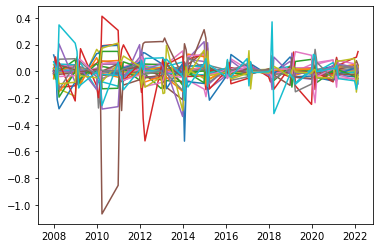

In [172]:
plt.plot(Date, Xhat-X)

In [173]:
junk = np.var(Xhat,axis=0)

junk1 = np.var(X, axis= 0)

ERROR = Xhat -X
SEE = np.sum(ERROR**2, axis=0)
print(SEE)
SEE1 = np.sum(SEE)
print(SEE1)

# Format the dates as 'YYYY-MM-DD'


[0.00398411 0.00238864 0.00529416 0.01225705 0.01825107 0.12546835
 0.23053899 0.01005569 0.04186226 0.04703049 0.04725167 0.03000853
 0.13571546 0.28617475 0.14885421 2.32575932 0.04537513 0.17055104
 0.19713656 0.1021398  0.80666589 0.22634737 0.25590566 1.20257611
 0.58349006 0.37839616 0.33109685 0.1760559  0.52771313 0.83515947]
9.309503868854176
